# Import necessary libraries





In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Load the datasets

In [ ]:
# Load the datasets
matches = pd.read_csv('matches.csv')
matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
deliveries = pd.read_csv('deliveries.csv')
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


# Preprocessing the matches dataset

In [ ]:
# Preprocessing the matches dataset
# Selecting relevant columns
matches = matches[['id', 'team1', 'team2', 'winner', 'Season', 'venue']]

# Handling missing values in the 'winner' column

In [ ]:
# Handling missing values in the 'winner' column
matches.dropna(subset=['winner'], inplace=True)

<ipython-input-5-e2e4ede39883>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches.dropna(subset=['winner'], inplace=True)


# Encode the team names into numerical values

In [ ]:
# Encode the team names into numerical values
team_map = {team: i for i, team in enumerate(matches['team1'].unique())}
matches['team1'] = matches['team1'].map(team_map)
matches['team2'] = matches['team2'].map(team_map)
matches['winner'] = matches['winner'].map(team_map)

<ipython-input-6-6303b633590a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['team1'] = matches['team1'].map(team_map)
<ipython-input-6-6303b633590a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['team2'] = matches['team2'].map(team_map)
<ipython-input-6-6303b633590a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

# Preprocessing deliveries dataset to calculate total runs for each team

In [ ]:
# Preprocessing deliveries dataset to calculate total runs for each team
# Map the batting team to its encoded value (team_map from matches dataset)
deliveries['batting_team'] = deliveries['batting_team'].map(team_map)

# Calculate total runs scored by each team in each match

In [ ]:
# Calculate total runs scored by each team in each match
total_runs = deliveries.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

# **Merge total runs for team1 and team2**

# Merge runs for team1

In [ ]:
# Merge total runs for team1 and team2
# Merge runs for team1
team1_runs = total_runs.rename(columns={'batting_team': 'team1', 'total_runs': 'total_runs_team1'})
matches = matches.merge(team1_runs[['match_id', 'team1', 'total_runs_team1']], left_on=['id', 'team1'], right_on=['match_id', 'team1'], how='left')



# Merge runs for team2

In [ ]:
# Merge runs for team2
team2_runs = total_runs.rename(columns={'batting_team': 'team2', 'total_runs': 'total_runs_team2'})
matches = matches.merge(team2_runs[['match_id', 'team2', 'total_runs_team2']], left_on=['id', 'team2'], right_on=['match_id', 'team2'], how='left')




# Dropping columns that are not needed
# Handle any missing values that might have been introduced

In [ ]:
# Dropping columns that are not needed
matches.drop(columns=['match_id_x', 'match_id_y'], inplace=True)

# Handle any missing values that might have been introduced
matches.dropna(inplace=True)

# Split dataset into features and labels

In [ ]:
# Split dataset into features and labels
X = matches[['team1', 'team2', 'total_runs_team1', 'total_runs_team2']]  # Features
y = matches['winner']  # Labels (Target)



# Split the data into training and testing sets


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model training using RandomForestClassifier

In [ ]:
# Model training using RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Predict the test set

In [ ]:
# Predict the test set
y_pred = model.predict(X_test)


# Model Evaluation

In [ ]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.64


# confusion Matrix

In [ ]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Confusion Matrix:
 [[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 13  0  0  0  0  1  0  0  0  0  0]
 [ 0  2  0  0  1 13  2  3  0  0  0  0  0  0  0]
 [ 0  1  0  0  2  1  8  0  1  0  0  0  0  0  0]
 [ 2  1  0  0  2  1  0  9  1  0  0  0  0  1  0]
 [ 1  1  0  0  2  1  0  2 11  0  0  0  0  0  0]
 [ 0  1  0  0  1  1  0  3  1 13  0  0  0  0  0]
 [ 0  1  0  0  1  1  0  0  2  2  0  1  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  1  0  0  1  2  0  0  0  0  0  0  1  0  0]]


# Classification Report

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       0.65      0.94      0.77        18
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       0.57      0.87      0.68        15
           5       0.62      0.62      0.62        21
           6       0.67      0.62      0.64        13
           7       0.53      0.53      0.53        17
           8       0.69      0.61      0.65        18
           9       0.76      0.65      0.70        20
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         5

    accuracy                           0.64       151
   macro avg       0.48      0.49      0.47       151
w

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# List of team pairs for prediction

In [ ]:
# List of team pairs for prediction
# ('Sunrisers Hyderabad', 'Royal Challengers Bangalore'),
# ('Mumbai Indians', 'Rising Pune Supergiant'),
# ('Sunrisers Hyderabad', 'Mumbai Indians'),
# ('Royal Challengers Bangalore', 'Rising Pune Supergiant')
team_pairs = [
    ('Sunrisers Hyderabad', 'Royal Challengers Bangalore'),
    ('Mumbai Indians', 'Rising Pune Supergiant'),
    ('Sunrisers Hyderabad', 'Mumbai Indians'),
    ('Royal Challengers Bangalore', 'Rising Pune Supergiant')
]

# Function to predict the winner of a match
def predict_winner(team1, team2):
    # Convert the team names to their encoded values
    team1_encoded = team_map.get(team1)
    team2_encoded = team_map.get(team2)

    if team1_encoded is None or team2_encoded is None:
        print(f"One of the teams {team1} or {team2} does not exist in the dataset.")
        return None

    # Get the average runs scored by each team
    team1_avg_runs = total_runs[total_runs['batting_team'] == team1_encoded]['total_runs'].mean()
    team2_avg_runs = total_runs[total_runs['batting_team'] == team2_encoded]['total_runs'].mean()

    # Handle case if there is no run data for the team
    if np.isnan(team1_avg_runs) or np.isnan(team2_avg_runs):
        print(f"No average run data available for teams {team1} or {team2}.")
        return None

    # Create a new match input for prediction
    new_match = pd.DataFrame([[team1_encoded, team2_encoded, team1_avg_runs, team2_avg_runs]],
                             columns=['team1', 'team2', 'total_runs_team1', 'total_runs_team2'])

    # Predict the winner for this new match
    predicted_winner_encoded = model.predict(new_match)[0]

    # Decode the predicted winner
    predicted_winner = [team for team, num in team_map.items() if num == predicted_winner_encoded][0]
    return predicted_winner

# Loop over the team pairs and predict the winner for each match
for team1, team2 in team_pairs:
    predicted_winner = predict_winner(team1, team2)
    if predicted_winner:
        print(f"Predicted winner between {team1} and {team2} is: {predicted_winner}")


Predicted winner between Sunrisers Hyderabad and Royal Challengers Bangalore is: Royal Challengers Bangalore
Predicted winner between Mumbai Indians and Rising Pune Supergiant is: Mumbai Indians
Predicted winner between Sunrisers Hyderabad and Mumbai Indians is: Mumbai Indians
Predicted winner between Royal Challengers Bangalore and Rising Pune Supergiant is: Royal Challengers Bangalore


# visualization

<ipython-input-28-c681581d06c7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team_name', y='total_runs', data=avg_runs, palette='coolwarm')


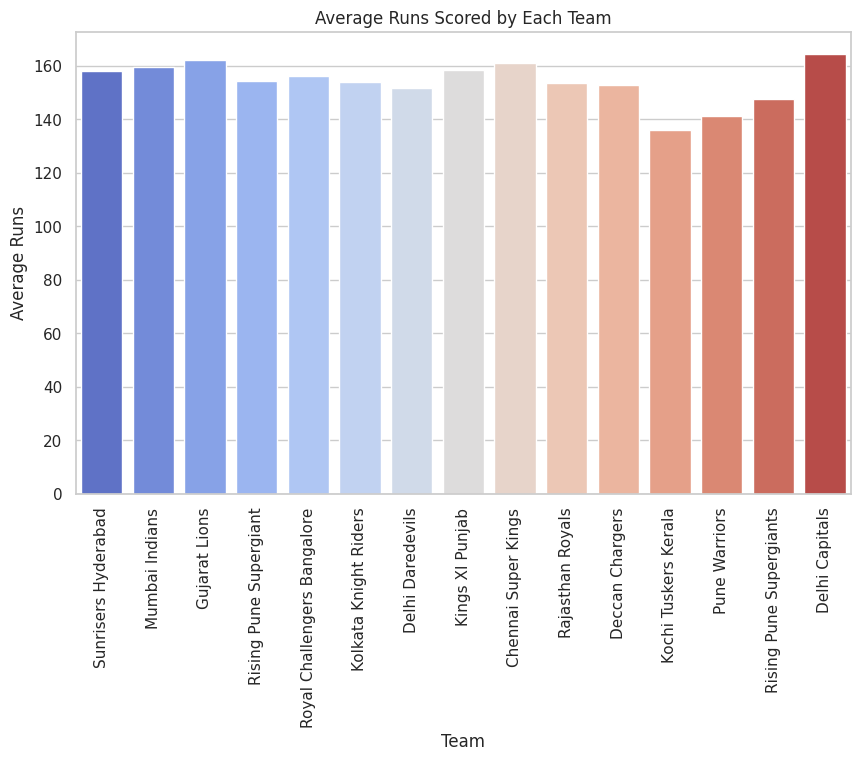

In [28]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style='whitegrid')

# Function to visualize team-wise average runs
def visualize_team_avg_runs():
    # Calculate average runs scored by each team
    avg_runs = total_runs.groupby('batting_team')['total_runs'].mean().reset_index()
    avg_runs['team_name'] = avg_runs['batting_team'].map({v: k for k, v in team_map.items()})

    # Plot the average runs per team
    plt.figure(figsize=(10, 6))
    sns.barplot(x='team_name', y='total_runs', data=avg_runs, palette='coolwarm')
    plt.title('Average Runs Scored by Each Team')
    plt.xticks(rotation=90)
    plt.xlabel('Team')
    plt.ylabel('Average Runs')
    plt.show()

# Visualize team-wise average runs
visualize_team_avg_runs()

<ipython-input-25-175e919acc15>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team_name', y='wins', data=team_wins, palette='Set2')


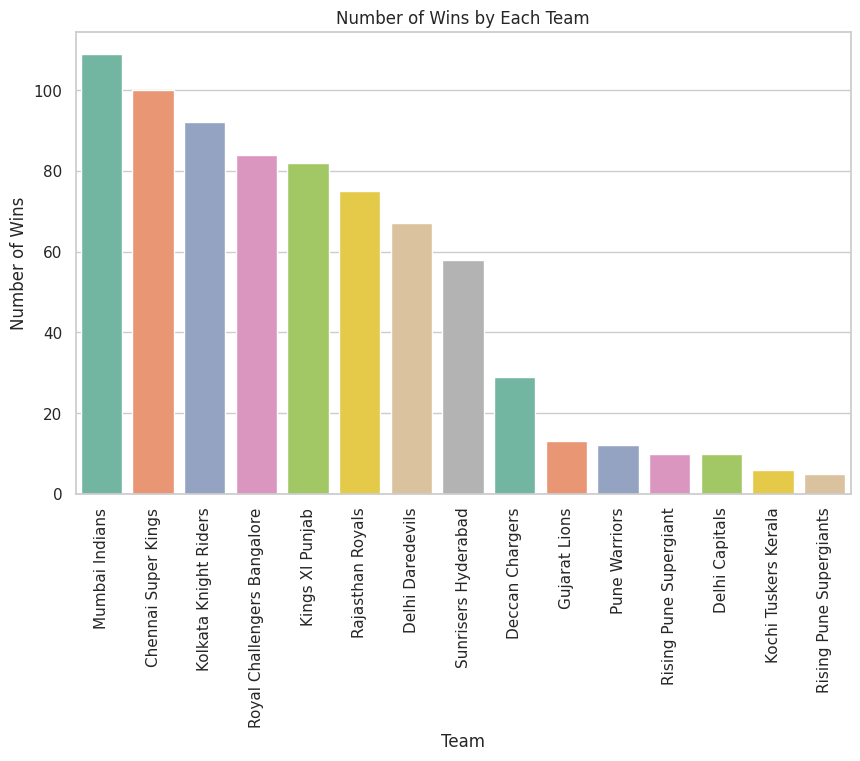

In [25]:
# Function to visualize match results (actual wins)
def visualize_match_results():
    # Count the number of wins for each team
    team_wins = matches['winner'].value_counts().reset_index()
    team_wins.columns = ['winner_encoded', 'wins']
    team_wins['team_name'] = team_wins['winner_encoded'].map({v: k for k, v in team_map.items()})

    # Plot the wins per team
    plt.figure(figsize=(10, 6))
    sns.barplot(x='team_name', y='wins', data=team_wins, palette='Set2')
    plt.title('Number of Wins by Each Team')
    plt.xticks(rotation=90)
    plt.xlabel('Team')
    plt.ylabel('Number of Wins')
    plt.show()

# Visualize match results (actual wins)
visualize_match_results()


<ipython-input-26-a57bb743a64d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


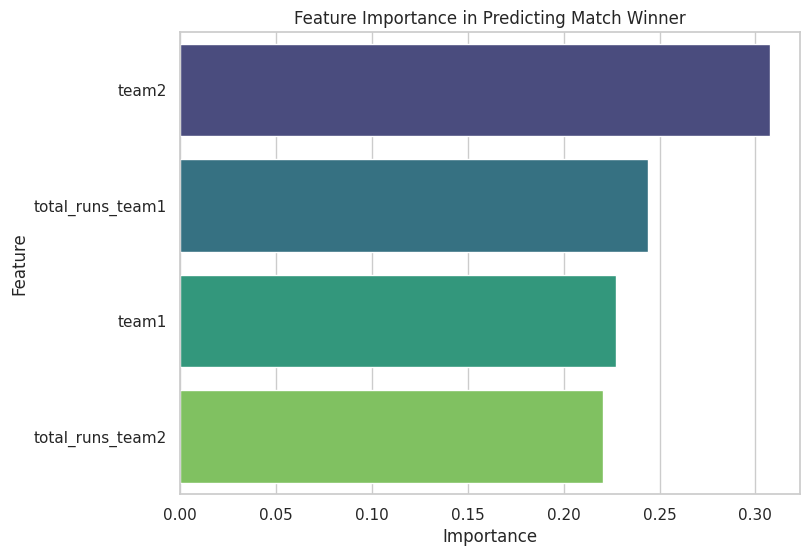

In [26]:
# Function to visualize feature importance for prediction model
def visualize_feature_importance(model, feature_names):
    # Get feature importance
    importance = model.feature_importances_

    # Create a DataFrame for visualization
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
    plt.title('Feature Importance in Predicting Match Winner')
    plt.show()

# Visualize feature importance (from the trained model)
visualize_feature_importance(model, feature_names=['team1', 'team2', 'total_runs_team1', 'total_runs_team2'])

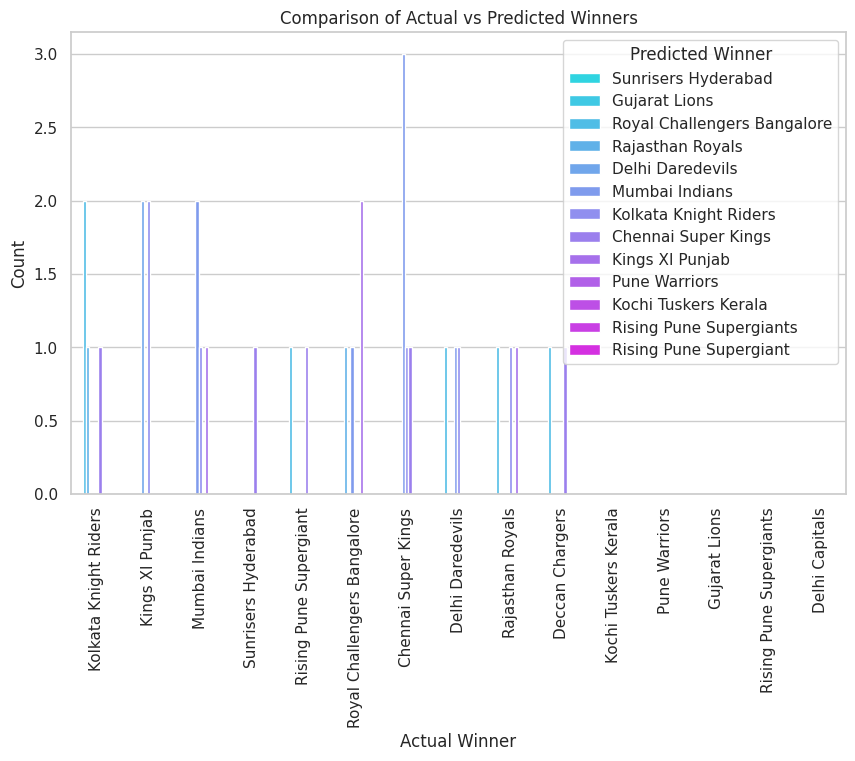

In [27]:
# Function to visualize predicted vs actual winners (for test set)
def visualize_predicted_vs_actual(y_test, y_pred):
    # Convert encoded predictions and actual results back to team names
    y_test_teams = y_test.map({v: k for k, v in team_map.items()})
    y_pred_teams = pd.Series(y_pred).map({v: k for k, v in team_map.items()})

    # Create a comparison DataFrame
    comparison_df = pd.DataFrame({'Actual Winner': y_test_teams, 'Predicted Winner': y_pred_teams})

    # Plot actual vs predicted winners
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Actual Winner', hue='Predicted Winner', data=comparison_df, palette='cool')
    plt.title('Comparison of Actual vs Predicted Winners')
    plt.xticks(rotation=90)
    plt.xlabel('Actual Winner')
    plt.ylabel('Count')
    plt.show()

# Visualize predicted vs actual winners on test data
visualize_predicted_vs_actual(y_test, y_pred)